<a href="https://colab.research.google.com/github/LaraSaads/Projects/blob/main/LOAN_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn. model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df=pd.read_csv('/content/train Loan prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df['Credit_History'].unique()


array([ 1.,  0., nan])

In [ ]:
df = df.drop(['Loan_ID'], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
for gender in df['Gender']:
  if gender=='Male':
    df['Gender']=0
  else:
    df['Gender']=1

In [ ]:
encoder=LabelEncoder()
columns_to_encode = ['Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Status']

for col in columns_to_encode:
  df[col] = encoder.fit_transform(df[col])

In [ ]:
encoder = LabelEncoder()

df['Property_Area'] = encoder.fit_transform(df['Property_Area'])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [ ]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
scaler=StandardScaler()
df[cols]=scaler.fit_transform(df[cols])

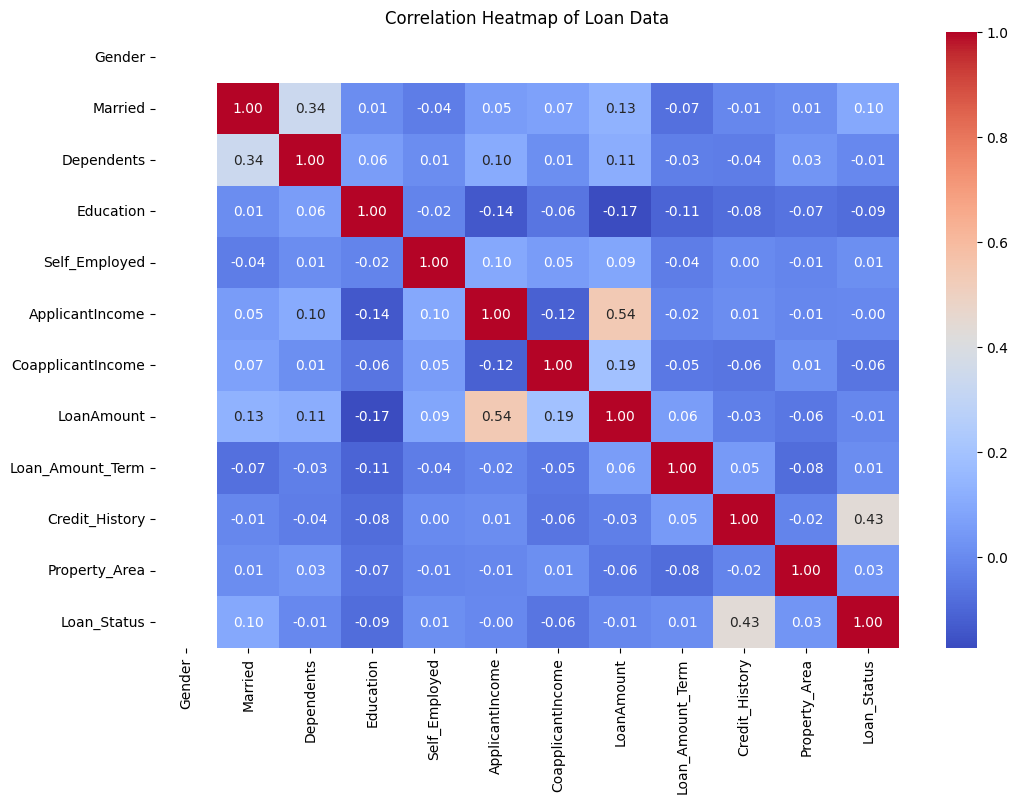

In [ ]:
df.corr()['Loan_Status']
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Loan Data")
plt.show()


In [ ]:
x=df.drop(columns=['Loan_Status'])
y=df['Loan_Status']

print("Top correlations with Loan Status:")
print(df.corr()["Loan_Status"].abs().sort_values(ascending=False).head(11))

selector = SelectKBest(f_classif, k=min(11, x.shape[1]))
selector.fit(x, y)
selected_features = x.columns[selector.get_support()].tolist()
print("Selected features:", selected_features)

x_selected = selector.transform(x)

Top correlations with Loan Status:
Loan_Status          1.000000
Credit_History       0.432616
Married              0.096657
Education            0.085884
CoapplicantIncome    0.059187
Property_Area        0.032112
Self_Employed        0.010880
LoanAmount           0.010631
Dependents           0.007318
Loan_Amount_Term     0.007306
ApplicantIncome      0.004710
Name: Loan_Status, dtype: float64
Selected features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
df.shape

(614, 12)

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x_selected, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
DT = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42, n_estimators=100)
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('dt', DT), ('rf', RF)], voting='hard')

In [ ]:
for model, name in zip([log_reg, DT, RF, voting_clf],
                       ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Voting Ensemble']):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.8049
Confusion Matrix:
 [[22 16]
 [ 8 77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.58      0.65        38
           1       0.83      0.91      0.87        85

    accuracy                           0.80       123
   macro avg       0.78      0.74      0.76       123
weighted avg       0.80      0.80      0.80       123


Decision Tree Accuracy: 0.6098
Confusion Matrix:
 [[17 21]
 [27 58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.45      0.41        38
           1       0.73      0.68      0.71        85

    accuracy                           0.61       123
   macro avg       0.56      0.56      0.56       123
weighted avg       0.63      0.61      0.62       123


Random Forest Accuracy: 0.7886
Confusion Matrix:
 [[24 14]
 [12 73]]
Classification Report:
               precision    recall  f1-score   support

   

In [ ]:
import joblib
joblib.dump(log_reg, 'log_reg.pkl')
print("\nVoting model saved as log_reg.pkl")


Voting model saved as log_reg.pkl


In [ ]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.2 MB/s eta 0:00:00


In [ ]:
df.head()



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,-1.599278,0.314162,1.0,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.149160,0.314162,1.0,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.851561,0.314162,1.0,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.239792,0.314162,1.0,2,1
4,1,0,0,0,0,0.097728,-0.554487,-0.001882,0.314162,1.0,2,1


In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

st.title("Loan Prediction")
st.write("Your probability of gettings you loan apporved/n***model is only 1 day old it might make mistakes:)")


Gender=st.selectbox("Gender:/n*(0=Male, 1=Female)", [1, 0])
Married=st.selectbox("Are you married?/n*(1=yes, 0=no)",[1,0])
Dependents=st.selectbox("How many dependents you have?", [0,1,2,3,4])
Education=st.selectbox("Education Status:/n*(1=Graduate, 0=Not Graduate)",[1,0])
Self_Employed=st.selectbox("Are you self empolyed?/n*(1=yes, 0=no)",[1,0])
ApplicantIncome=st.number_input("Please Enter your income:")
CoapplicantIncome=st.number_input("Please Enter your coapplicant income if exists:")
Property_Area=st.selectbox("Please select your area category:/n (Rural=0, Semiurban=1, Urban=2)", [0, 1, 2])
LoanAmount=st.number_input("Please Enter your desired loan amount:")
Loan_Amount_Term=st.number_input("Select Your Loan Term:/n*12=1 year", 12.0, 480.0, step=2.0)
Credit_History=st.selectbox("Please select your credit history:/n*(1=yes, 0=no)",[1,0])

model = joblib.load('log_reg.pkl')

if st.button('Predict'):
    input_data = np.array([[Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,LoanAmount,Loan_Amount_Term,Credit_History]])
    prediction = model.predict(input_data)
    result = "REJECTED!" if prediction[0] == 1 else "APPROVED:)"
    st.subheader(result)



Overwriting app.py


In [ ]:
!pip install pyngrok --quiet

!pkill -f ngrok
!pkill -f streamlit

In [ ]:
from pyngrok import ngrok
import threading, time, os

NGROK_AUTH_TOKEN = "33e8Y2MIZeTSQVzzM7kBcR8m5y8_5qcDDj17CmmrZGNDB592d"
os.system(f"ngrok config add-authtoken {NGROK_AUTH_TOKEN}")

def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit)
thread.start()
time.sleep(10)

public_url = ngrok.connect(8501)
print("Your Streamlit app is live here:", public_url)

Your Streamlit app is live here: NgrokTunnel: "https://rowan-unbitter-fallon.ngrok-free.dev" -> "http://localhost:8501"
